In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/5741/loan_筛选后1.xlsx")

df

,loan_amnt,funded_amnt,funded_sub_loan,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,total_rec_prncp
0,15000,15000,0,36,14.27,C,C2,9,RENT,60000.0,Charged Off,debt_consolidation,NY,15.22,0.00
1,4375,4375,0,36,7.51,A,A3,7,MORTGAGE,17108.0,Fully Paid,debt_consolidation,NY,20.34,4375.00
2,14400,14400,0,36,8.90,A,A5,1,OWN,150000.0,Fully Paid,debt_consolidation,NY,14.85,14400.00
3,35000,22075,-12925,60,17.27,D,D3,3,MORTGAGE,150000.0,Fully Paid,home_improvement,NY,7.51,22075.00
4,11800,11800,0,36,12.69,B,B5,6,RENT,42000.0,Fully Paid,credit_card,NY,9.86,11800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20312,6000,6000,0,36,13.66,C,C3,4,RENT,60000.0,Fully Paid,debt_consolidation,NY,21.10,6000.00
20313,7000,7000,0,36,13.66,C,C3,10,RENT,48681.0,Fully Paid,debt_consolidation,NY,10.85,7000.00
20314,20000,20000,0,36,14.31,C,C4,4,MORTGAGE,262000.0,Fully Paid,home_improvement,NY,9.51,20000.00
20315,27650,27650,0,60,21.99,E,E5,1,RENT,60000.0,Fully Paid,credit_card,NY,10.10,27650.00


**Train / Test Split**

In [ ]:
df = df.sample(frac = 1)
train_proportion = 0.8
n = len(df)
t = int(train_proportion * n)
target = df['loan_status']

In [ ]:
t = int(train_proportion * n)
target = df['loan_status']
data = df.drop(columns = ["loan_status","addr_state","sub_grade","funded_amnt","loan_amnt"])
train_x = data.iloc[:t,:]
test_x = data.iloc[t:,:]
train_y = target[:t]
test_y = target[t:]
# let's take a look
#print('Training dataset: ', train_x)

In [ ]:
grade_mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
# Convert the grade column using the mapping
train_x['grade'] = train_x['grade'].map(grade_mapping)
test_x['grade'] = test_x['grade'].map(grade_mapping)

<ipython-input-8-af67ca29d035>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['grade'] = train_x['grade'].map(grade_mapping)
<ipython-input-8-af67ca29d035>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['grade'] = test_x['grade'].map(grade_mapping)


In [ ]:
one_hot_encoded_data = pd.get_dummies(train_x[['home_ownership', 'purpose']], drop_first=True)
train_x.drop(['home_ownership', 'purpose'], axis=1, inplace=True)
loan_data_encoded_corrected = train_x.join(one_hot_encoded_data)
loan_data_encoded_corrected.head()

<ipython-input-9-57001546d606>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x.drop(['home_ownership', 'purpose'], axis=1, inplace=True)


,funded_sub_loan,term,int_rate,grade,emp_length,annual_inc,dti,total_rec_prncp,home_ownership_OWN,home_ownership_RENT,...,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
1161,0,36,10.37,6,1,50000.0,7.06,6999.99,False,True,...,False,False,False,False,False,False,False,False,False,False
15803,0,60,10.99,6,10,42000.0,12.66,10400.00,False,False,...,False,False,False,False,False,False,False,False,False,False
19904,0,36,13.66,5,8,93000.0,1.68,3742.96,False,True,...,False,False,False,False,False,False,False,False,False,False
19680,0,36,13.33,5,2,48000.0,12.93,4000.00,False,True,...,False,False,False,False,False,False,False,False,False,False
20019,0,36,15.59,4,2,36000.0,7.97,5000.00,False,True,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
one_hot_encoded_data = pd.get_dummies(test_x[['home_ownership', 'purpose']], drop_first=True)
test_x.drop(['home_ownership', 'purpose'], axis=1, inplace=True)
test_x_new = test_x.join(one_hot_encoded_data)
test_x_new.head()

<ipython-input-10-8d48c4008827>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x.drop(['home_ownership', 'purpose'], axis=1, inplace=True)


,funded_sub_loan,term,int_rate,grade,emp_length,annual_inc,dti,total_rec_prncp,home_ownership_OWN,home_ownership_RENT,...,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
19977,0,36,14.99,5,3,450000.0,11.95,15000.0,False,False,...,False,False,False,False,False,False,False,False,False,False
10387,0,36,12.12,6,1,50000.0,24.67,9600.0,False,True,...,False,False,False,False,False,False,False,False,False,False
3982,0,36,7.90,7,2,112000.0,14.62,20000.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4179,0,36,19.52,4,10,76229.0,19.90,8000.0,False,True,...,False,False,False,False,True,False,False,False,False,False
18933,0,36,11.53,6,5,68000.0,9.87,7200.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = loan_data_encoded_corrected
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test_x_new)


In [ ]:
X_test_scaled.shape

(4064, 22)

## Our Approch
1. Logestic Regression
  1. Logestic Regression with PCA
  2. Keral Regression or SVM
2. SVM with soft_max
3. Naive Bayes
4. Deep Learning (Dense + Softmax)
5. Randome Forest


### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### Ordinary Logistic Regression

In [ ]:
regression_weights = {'Charged Off': 3, 'Fully Paid': 1, 'Late (31-120 days)':1, 'Default': 1.5, 'Late (16-30 days)': 1}
OLR_model = LogisticRegression(multi_class='multinomial',class_weight = regression_weights,max_iter=1000)
OLR_model.fit(X_train_scaled, train_y)

LogisticRegression(class_weight={'Charged Off': 3, 'Default': 1.5,
                                 'Fully Paid': 1, 'Late (16-30 days)': 1,
                                 'Late (31-120 days)': 1},
                   max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred_OLR_model = OLR_model.predict(X_test_scaled)

In [ ]:
np.mean(y_pred_OLR_model == test_y)

0.8203740157480315

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


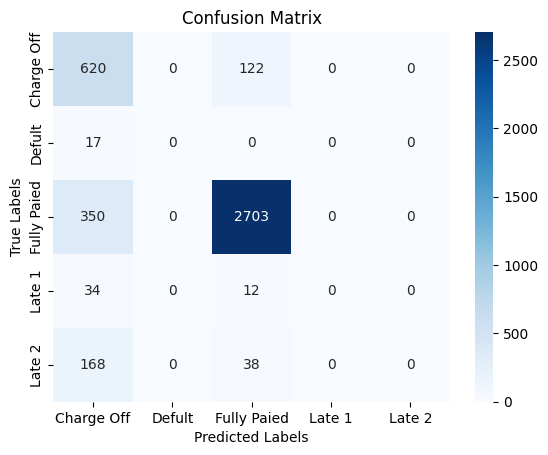

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Suppose we have the following class names
class_names = ['Charge Off', 'Defult', 'Fully Paied', 'Late 1', 'Late 2']
conf_matrix = confusion_matrix(test_y, y_pred_OLR_model)
class_report = classification_report(test_y, y_pred_OLR_model)
# Recreate the confusion matrix heatmap with actual class names
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(test_y, y_pred_OLR_model))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

       Charged Off       0.50      0.83      0.62       675
           Default       0.00      0.00      0.00        23
        Fully Paid       0.94      0.90      0.92      3100
 Late (16-30 days)       0.00      0.00      0.00        57
Late (31-120 days)       0.00      0.00      0.00       209

          accuracy                           0.82      4064
         macro avg       0.29      0.34      0.31      4064
      weighted avg       0.80      0.82      0.80      4064



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Improved Logistic Regression

In [ ]:
ILG_model = LogisticRegression(multi_class='multinomial', solver='', class_weight = regression_weights, max_iter=1000)
ILG_model.fit(X_train_scaled, train_y)

LogisticRegression(class_weight={'Charged Off': 3, 'Default': 1.5,
                                 'Fully Paid': 1, 'Late (16-30 days)': 1,
                                 'Late (31-120 days)': 1},
                   max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred_ILG_model = ILG_model.predict(X_test_scaled)
np.mean(y_pred_ILG_model == test_y)

0.8203740157480315

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


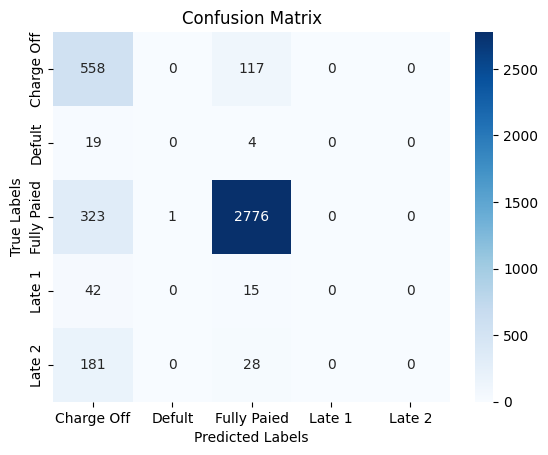

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Suppose we have the following class names
class_names = ['Charge Off', 'Defult', 'Fully Paied', 'Late 1', 'Late 2']
conf_matrix = confusion_matrix(test_y, y_pred_ILG_model)
class_report = classification_report(test_y, y_pred_ILG_model)
# Recreate the confusion matrix heatmap with actual class names
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(test_y, y_pred_ILG_model))

                    precision    recall  f1-score   support

       Charged Off       0.50      0.83      0.62       675
           Default       0.00      0.00      0.00        23
        Fully Paid       0.94      0.90      0.92      3100
 Late (16-30 days)       0.00      0.00      0.00        57
Late (31-120 days)       0.00      0.00      0.00       209

          accuracy                           0.82      4064
         macro avg       0.29      0.34      0.31      4064
      weighted avg       0.80      0.82      0.80      4064



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Normal SVM

In [ ]:
# Data Prep:
X_test_svm = X_test_scaled
X_train_svm = X_train_scaled

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


# SVM Classifier
svm = SVC(kernel='rbf', C=1, random_state=0)
svm.fit(X_train_svm, train_y)

# Predictions
y_pred = svm.predict(X_test_svm)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))
print("Classification Report:")
print(classification_report(test_y, y_pred))

Confusion Matrix:
[[ 407    0  268    0    0]
 [  16    0    7    0    0]
 [  62    0 3038    0    0]
 [  33    0   24    0    0]
 [ 137    0   72    0    0]]
Classification Report:
                    precision    recall  f1-score   support

       Charged Off       0.62      0.60      0.61       675
           Default       0.00      0.00      0.00        23
        Fully Paid       0.89      0.98      0.93      3100
 Late (16-30 days)       0.00      0.00      0.00        57
Late (31-120 days)       0.00      0.00      0.00       209

          accuracy                           0.85      4064
         macro avg       0.30      0.32      0.31      4064
      weighted avg       0.78      0.85      0.81      4064



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


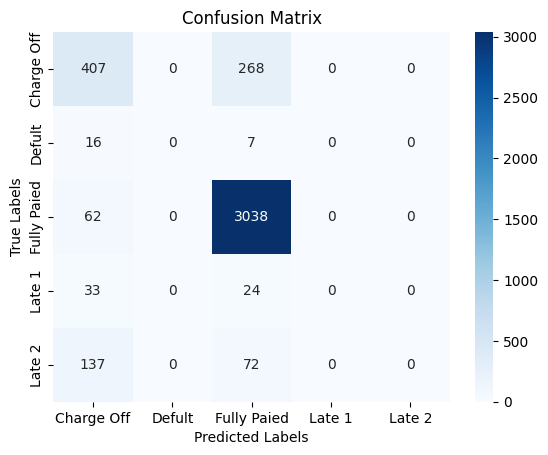

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Suppose we have the following class names
class_names = ['Charge Off', 'Defult', 'Fully Paied', 'Late 1', 'Late 2']
conf_matrix = confusion_matrix(test_y, y_pred)
class_report = classification_report(test_y, y_pred_ILG_model)
# Recreate the confusion matrix heatmap with actual class names
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


# SVM Classifier
svm = SVC(kernel='poly', C=10, random_state=0)
svm.fit(X_train_svm, train_y)

# Predictions
y_pred = svm.predict(X_test_svm)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))
print("Classification Report:")
print(classification_report(test_y, y_pred))

Confusion Matrix:
[[ 466    1  269    1    5]
 [  10    0    6    1    0]
 [  78    0 2966    0    9]
 [  23    0   23    0    0]
 [ 128    0   77    0    1]]
Classification Report:
                    precision    recall  f1-score   support

       Charged Off       0.66      0.63      0.64       742
           Default       0.00      0.00      0.00        17
        Fully Paid       0.89      0.97      0.93      3053
 Late (16-30 days)       0.00      0.00      0.00        46
Late (31-120 days)       0.07      0.00      0.01       206

          accuracy                           0.84      4064
         macro avg       0.32      0.32      0.32      4064
      weighted avg       0.79      0.84      0.82      4064



In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


# SVM Classifier
svm = SVC(kernel='sigmoid', C=2, random_state=0)
svm.fit(X_train_svm, train_y)

# Predictions
y_pred = svm.predict(X_test_svm)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))
print("Classification Report:")
print(classification_report(test_y, y_pred))

Confusion Matrix:
[[ 400    0  252    9   48]
 [  12    0    7    0    3]
 [ 278    0 2789    2   21]
 [  23    0   16    1    0]
 [ 125    0   63    3   12]]
Classification Report:
                    precision    recall  f1-score   support

       Charged Off       0.48      0.56      0.52       709
           Default       0.00      0.00      0.00        22
        Fully Paid       0.89      0.90      0.90      3090
 Late (16-30 days)       0.07      0.03      0.04        40
Late (31-120 days)       0.14      0.06      0.08       203

          accuracy                           0.79      4064
         macro avg       0.32      0.31      0.31      4064
      weighted avg       0.77      0.79      0.78      4064



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
np.mean(y_pred == test_y)

0.7878937007874016

## Naive Bayes

In [ ]:
y_train = train_y
y_test = test_y

In [ ]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Cross-validation
scores = cross_val_score(gnb, X_train_scaled, y_train, cv=10)
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

# Predictions and evaluation
SVM_y_pred = gnb.predict(X_test_svm)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Accuracy Scores: [0.02890529 0.02398524 0.02152522 0.02523077 0.024      0.02461538
 0.02953846 0.02584615 0.02830769 0.02830769]
Mean CV Accuracy: 0.026026189800359544
Confusion Matrix:
[[   5   57    5  593   15]
 [   0    3    0   19    1]
 [  13  217   57 2773   40]
 [   0    1    0   56    0]
 [   0   17    0  185    7]]

Classification Report:
                    precision    recall  f1-score   support

       Charged Off       0.28      0.01      0.01       675
           Default       0.01      0.13      0.02        23
        Fully Paid       0.92      0.02      0.04      3100
 Late (16-30 days)       0.02      0.98      0.03        57
Late (31-120 days)       0.11      0.03      0.05       209

          accuracy                           0.03      4064
         macro avg       0.27      0.23      0.03      4064
      weighted avg       0.75      0.03      0.03      4064



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


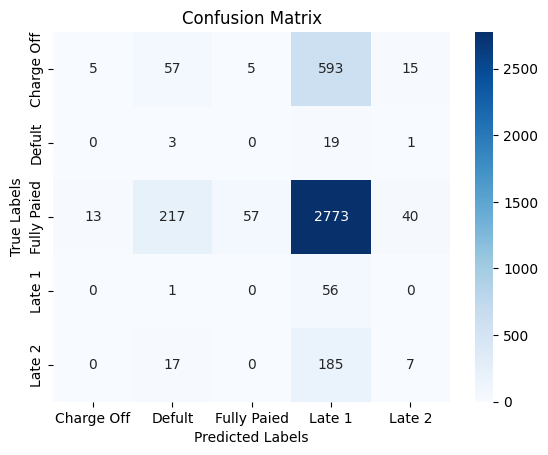

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Suppose we have the following class names
class_names = ['Charge Off', 'Defult', 'Fully Paied', 'Late 1', 'Late 2']
conf_matrix = confusion_matrix(test_y, y_pred)
class_report = classification_report(test_y, y_pred_ILG_model)
# Recreate the confusion matrix heatmap with actual class names
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X_train_scaled.shape

(16253, 22)

### Deep Learning:

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded integer labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Convert encoded labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=5)
y_test_encoded = label_encoder.fit_transform(y_test)

y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=5)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Normalize the feature data
X_train_normalized = X_train_scaled
X_test_normalized = X_test_svm

# Define the neural network architecture
model = Sequential([
    layers.Dense(64, input_shape=(22,)),
    layers.Dense(32),
    layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train_normalized,
    y_train_one_hot,
    epochs=20,
    batch_size=32,
    validation_split=0.1  # Use part of the training data for validation
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_normalized, y_test_one_hot)
print(f'Test accuracy: {accuracy:.2f}')


Epoch 1/20
458/458 [==============================] - 3s 2ms/step - loss: 0.6168 - accuracy: 0.8112 - val_loss: 0.4677 - val_accuracy: 0.8401
Epoch 2/20
458/458 [==============================] - 1s 3ms/step - loss: 0.4776 - accuracy: 0.8479 - val_loss: 0.4767 - val_accuracy: 0.8376
Epoch 3/20
458/458 [==============================] - 1s 3ms/step - loss: 0.4758 - accuracy: 0.8469 - val_loss: 0.4679 - val_accuracy: 0.8444
Epoch 4/20
458/458 [==============================] - 1s 3ms/step - loss: 0.4755 - accuracy: 0.8458 - val_loss: 0.4579 - val_accuracy: 0.8376
Epoch 5/20
458/458 [==============================] - 1s 2ms/step - loss: 0.4728 - accuracy: 0.8480 - val_loss: 0.4682 - val_accuracy: 0.8419
Epoch 6/20
458/458 [==============================] - 1s 2ms/step - loss: 0.4723 - accuracy: 0.8476 - val_loss: 0.4695 - val_accuracy: 0.8333
Epoch 7/20
458/458 [==============================] - 1s 2ms/step - loss: 0.4735 - accuracy: 0.8466 - val_loss: 0.4664 - val_accuracy: 0.8413
Epoch 

In [ ]:
predictions = model.predict(X_test_normalized)
predictions

127/127 [==============================] - 0s 2ms/step


array([[1.0677558e-01, 3.0082674e-03, 8.3986986e-01, 7.5017074e-03,
        4.2844430e-02],
       [6.2605746e-02, 1.4867460e-03, 9.1376472e-01, 3.7097684e-03,
        1.8433161e-02],
       [6.7063019e-04, 9.3661001e-06, 9.9898124e-01, 1.0490140e-04,
        2.3374066e-04],
       ...,
       [2.1044984e-01, 2.8210538e-03, 7.4305880e-01, 4.5181196e-03,
        3.9152160e-02],
       [1.7061324e-03, 9.4967718e-06, 9.9738783e-01, 3.0698450e-04,
        5.8967393e-04],
       [9.4135761e-02, 2.0502021e-03, 8.6774856e-01, 4.9878671e-03,
        3.1077633e-02]], dtype=float32)

In [ ]:
y_test_one_hot

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

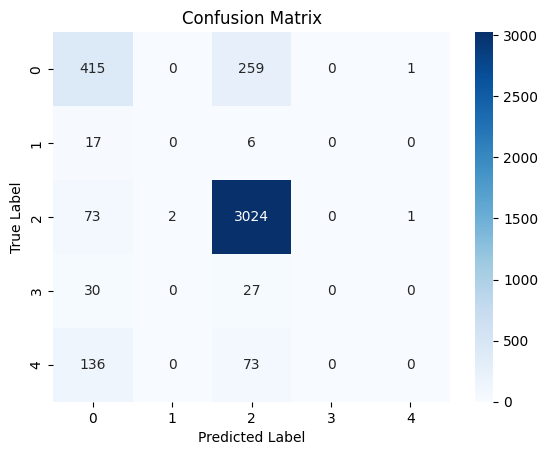

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predictions' is the array of predicted probabilities and 'y_test_one_hot' is the array of one-hot encoded true labels.

# Convert the predictions and true labels from one-hot encoded to class labels
predictions_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predictions_classes)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming y_train is not already encoded, let's encode it
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest classifier to the training data
rf_classifier.fit(X_train_normalized, y_train_one_hot)

# Predict on the test data
rf_predictions = rf_classifier.predict(X_test_normalized)

In [ ]:
print(classification_report(true_classes, predictions_classes))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       675
           1       0.00      0.00      0.00        23
           2       0.89      0.98      0.93      3100
           3       0.00      0.00      0.00        57
           4       0.00      0.00      0.00       209

    accuracy                           0.85      4064
   macro avg       0.30      0.32      0.31      4064
weighted avg       0.78      0.85      0.81      4064



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rf_predictions

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test_one_hot

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np

# Convert one-hot encoded predictions and true labels to class integers
rf_predictions_classes = np.argmax(rf_predictions, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Calculate the accuracy
accuracy = np.mean(rf_predictions_classes == y_test_classes)

# Alternatively, you can use sklearn's accuracy_score function
from sklearn.metrics import accuracy_score
accuracy_sklearn = accuracy_score(y_test_classes, rf_predictions_classes)

print(f'Accuracy: {accuracy}')
print(f'Accuracy (sklearn): {accuracy_sklearn}')


Accuracy: 0.8558070866141733
Accuracy (sklearn): 0.8558070866141733


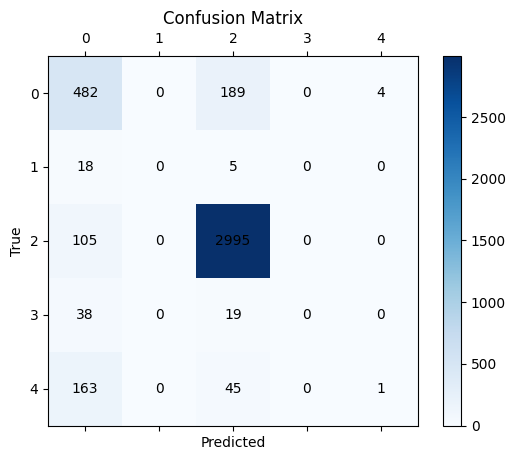

In [ ]:
rf_predictions_classes = np.argmax(rf_predictions, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test_classes, rf_predictions_classes)

# Plot the confusion matrix using matplotlib
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Add labels to the confusion matrix plot
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{}'.format(z), ha='center', va='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test_classes, rf_predictions_classes))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65       675
           1       0.00      0.00      0.00        23
           2       0.92      0.97      0.94      3100
           3       0.00      0.00      0.00        57
           4       0.20      0.00      0.01       209

    accuracy                           0.86      4064
   macro avg       0.34      0.34      0.32      4064
weighted avg       0.81      0.86      0.83      4064



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
